# Visualize Differences Across Cell Lines

**Gregory Way, 2019**

Visualize mean square error per feature for each cell line independently.

Also shown are F statistics, which calculates the ratio of between group variance / within group variance.

Therefore, we can interpret high F statistic values as cell health features with large differences in performance across cell lines while low values indicate features that are consistent across cell lines.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
set.seed(123)

In [3]:
consensus <- "modz"
results_dir <- "results"
figure_dir <- file.path("figures", "cell_line_performance")

cell_lines <- c("A549", "ES2", "HCC44")

## Load Label Data

In [4]:
# Annotated Cell Health Features
feat_file <- file.path("..", "1.generate-profiles", "data",
                       "labels", "feature_mapping_annotated.csv")
label_df <- readr::read_csv(feat_file, col_types = readr::cols())

head(label_df)

original_name,updated_name,feature_type,measurement,maria_thumbs_up,assay,description
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Row,well_row,metadata,NA,NA,NA,NA
Column,well_col,metadata,NA,NA,NA,NA
Plate Name,plate_name,metadata,NA,NA,NA,NA
sgRNA,guide,metadata,NA,NA,NA,NA
Inf %,cc_infection_percentage,metadata,NA,NA,crispr_efficiency,NA
% Inf,vb_infection_percentage,metadata,NA,NA,crispr_efficiency,NA


## Load Reconstruction Errors

In [5]:
regression_file <- file.path(results_dir,
                             paste0("full_cell_health_regression_", consensus, ".tsv.gz"))
regression_metrics_df <- readr::read_tsv(regression_file, col_types = readr::cols()) %>%
    dplyr::filter(cell_line %in% cell_lines)
    
head(regression_metrics_df)

value,metric,target,data_fit,shuffle,y_transform,cell_line
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9579419,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2
1.4122748,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2
0.9223675,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,HCC44
1.0707457,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,HCC44
0.9433766,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,A549
0.1958794,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,A549


## Process Data for Visualization

## Visualize

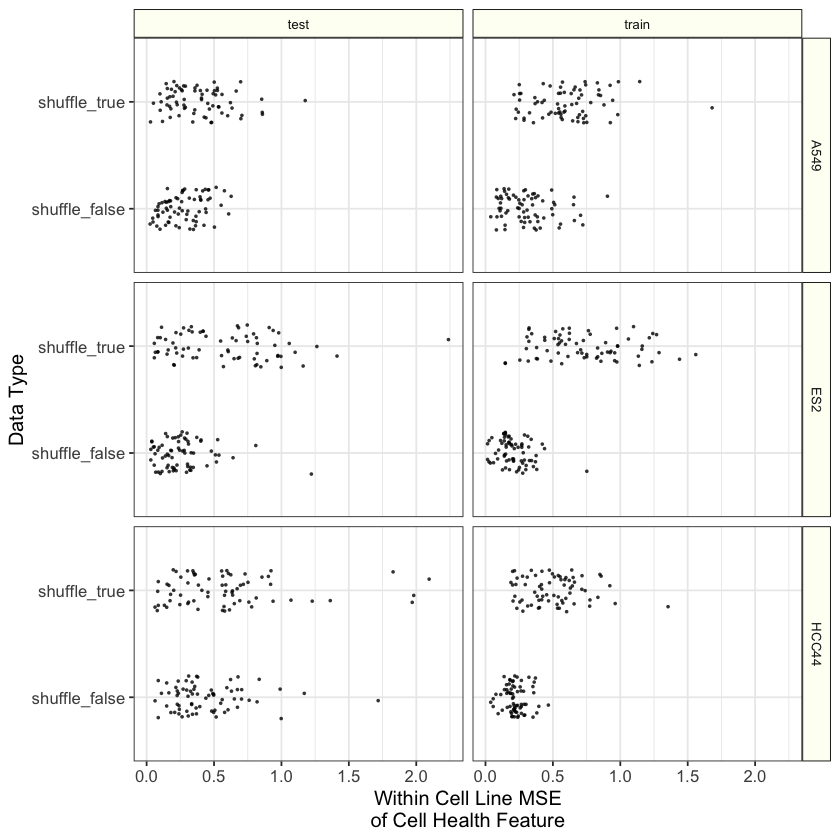

In [6]:
ggplot(regression_metrics_df %>% dplyr::filter(metric == "mse"),
       aes(x = shuffle,
           y = value)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_grid(cell_line~data_fit) +
    xlab("Data Type") +
    ylab("Within Cell Line MSE\nof Cell Health Feature") +
    coord_flip() +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_mse_differences_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

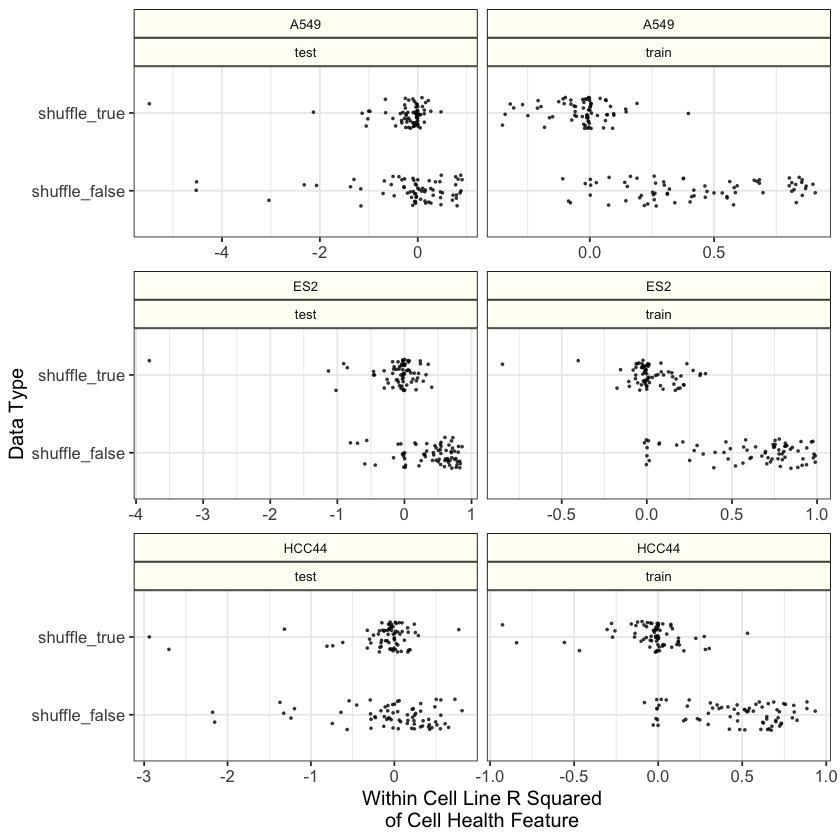

In [7]:
ggplot(regression_metrics_df %>% dplyr::filter(metric == "r_two"),
       aes(x = shuffle,
           y = value)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_wrap(cell_line~data_fit, ncol = 2, scales = "free_x") +
    xlab("Data Type") +
    ylab("Within Cell Line R Squared\nof Cell Health Feature") +
    coord_flip() +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_rsquared_differences_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

In [8]:
# Compile Results
results_df <- regression_metrics_df %>%
    dplyr::left_join(label_df, by = c("target" = "updated_name")) %>%
    dplyr::mutate(plot_group = paste(metric, target, shuffle))

dim(results_df)
head(results_df, 2)

[1] 1680   14

value,metric,target,data_fit,shuffle,y_transform,cell_line,original_name,feature_type,measurement,maria_thumbs_up,assay,description,plot_group
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
0.9579419,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true
1.4122748,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true


In [9]:
# Set some plotting defaults
measurement_colors <- c(
    "apoptosis" = "#a6cee3",
    "cell_cycle_arrest" = "#1f78b4",
    "cell_viability" = "#b2df8a",
    "death" = "#33a02c",
    "dna_damage" = "#fb9a99", 
    "g1_arrest" = "#fdbf6f",
    "g2_arrest" = "#ff7f00",
    "g2_m_arrest" = "#005c8c",
    "mitosis" = "green",
    "other" = "black",
    "s_arrest" = "#cab2d6",
    "toxicity" = "#6a3d9a"
)

measurement_labels <- c(
    "apoptosis" = "Apoptosis",
    "cell_cycle_arrest" = "Cell Cycle Arrest",
    "cell_viability" = "Cell Viability",
    "death" = "Death",
    "dna_damage" = "DNA Damage", 
    "g1_arrest" = "G1 Arrest",
    "g2_arrest" = "G2 Arrest",
    "g2_m_arrest" = "G2/M Arrest",
    "mitosis" = "Mitosis",
    "other" = "Other",
    "s_arrest" = "S Arrest",
    "toxicity" = "Toxicity"
)

dye_colors <- c(
    "hoechst" = "#639B94",
    "edu" = "#E45242",
    "gh2ax" = "#E2C552",
    "ph3" = "#7B9C32",
    "hoechst_gh2ax" = "#535f52",
    "hoechst_edu" = "#73414b",
    "edu_gh2ax" = "#e37a48",
    "caspase" = "#F7B1C1",
    "draq" = "#FF6699",
    "draq_caspase" = "#7f4a72",
    "many_cell_cycle" = "#E9DFC3",
    "crispr_efficiency" = "black"
)

dye_labels <- c(
    "hoechst" = "Hoechst",
    "edu" = "EdU",
    "gh2ax" = "gH2AX",
    "ph3" = "pH3",
    "hoechst_gh2ax" = "Hoechst + gH2AX",
    "hoechst_edu" = "Hoechst + EdU",
    "edu_gh2ax" = "EdU + gH2AX",
    "caspase" = "Caspase 3/7",
    "draq" = "DRAQ7",
    "draq_caspase" = "DRAQ7 + Caspase 3/7",
    "many_cell_cycle" = "Cell Cycle (Many Dyes)",
    "crispr_efficiency" = "CRISPR Efficiency"
)

In [10]:
head(results_df, 2)

value,metric,target,data_fit,shuffle,y_transform,cell_line,original_name,feature_type,measurement,maria_thumbs_up,assay,description,plot_group
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
0.9579419,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true
1.4122748,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true


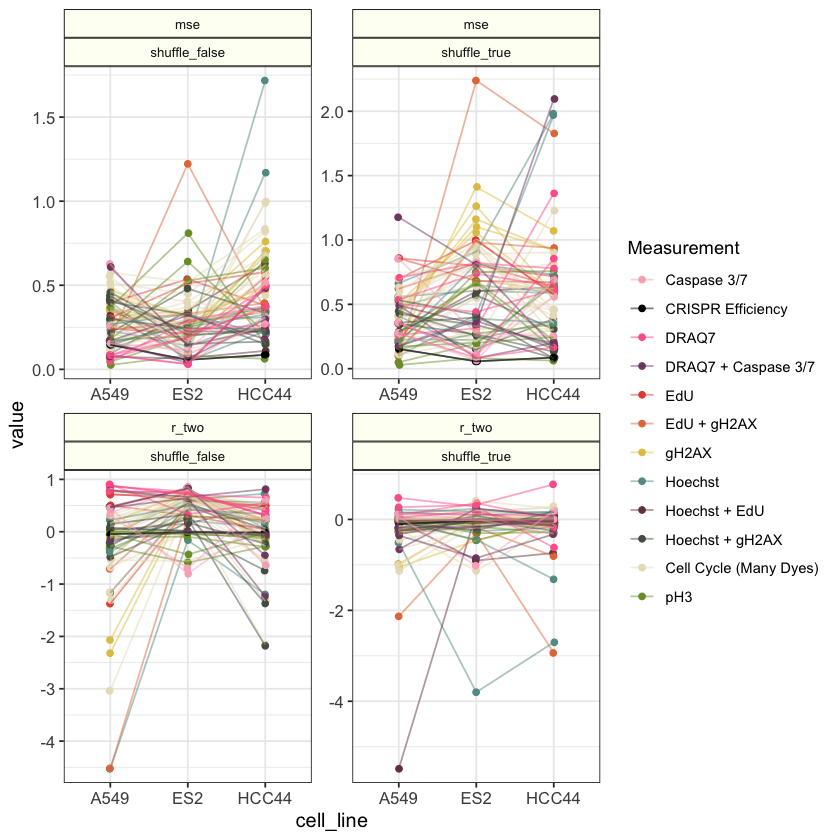

In [11]:
ggplot(results_df %>%
       dplyr::filter(data_fit == "test"),
       aes(x = cell_line,
           y = value,
           group = plot_group)) +
    geom_jitter(aes(color = assay), width = 0.01) +
    geom_line(aes(color = assay),
              alpha = 0.5) +
    scale_color_manual(name = "Measurement",
                       values = dye_colors,
                       labels = dye_labels) +
    facet_wrap(metric~shuffle, scales = "free") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_differences_target_linked_full_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

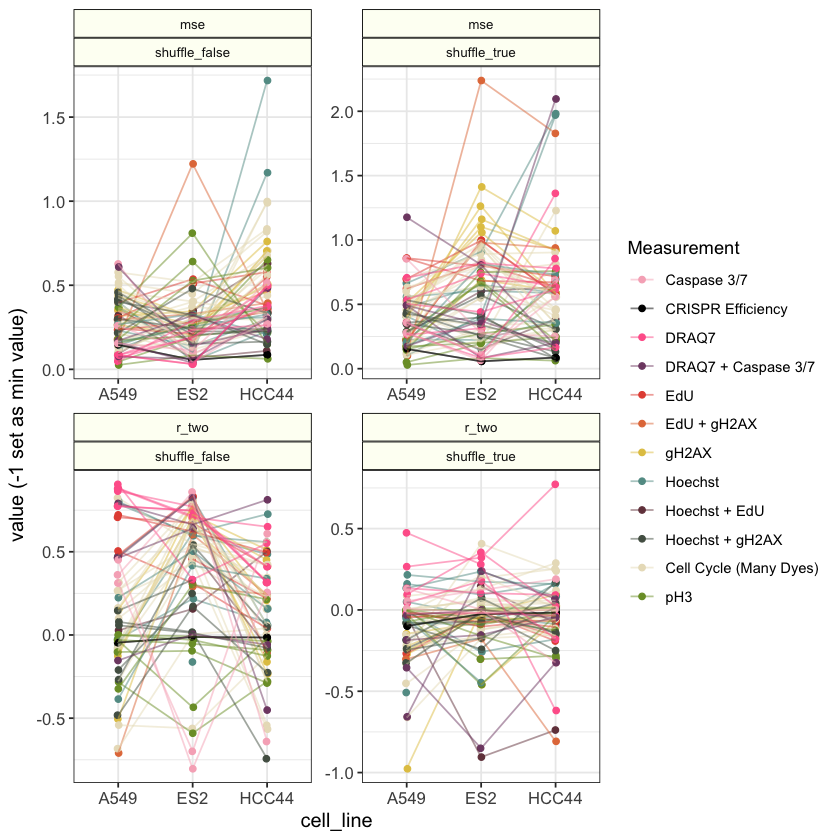

In [12]:
ggplot(results_df %>%
       dplyr::filter(data_fit == "test",
                     value > -1),
       aes(x = cell_line,
           y = value,
           group = plot_group)) +
    geom_jitter(aes(color = assay), width = 0.01) +
    geom_line(aes(color = assay),
              alpha = 0.5) +
    ylab("value (-1 set as min value)") +
    scale_color_manual(name = "Measurement",
                       values = dye_colors,
                       labels = dye_labels) +
    facet_wrap(metric~shuffle, scales = "free") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_differences_target_linked_subset_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

## Rank Models

Laslty, we rank models based on test set regression peformance in A549 cells.

In [13]:
filtered_results_df <- results_df %>%
    dplyr::filter(cell_line == "A549",
                  data_fit == "test",
                  metric == "r_two") %>%
    dplyr::select(value, metric, shuffle, target, original_name,
                  feature_type, measurement, assay, description) %>%
    tidyr::spread(shuffle, value) %>%
    dplyr::arrange(desc(shuffle_false))

filtered_results_df$target <- factor(filtered_results_df$target,
                                     levels = rev(unique(filtered_results_df$target)))
filtered_results_df$original_name <- factor(filtered_results_df$original_name,
                                            levels = rev(unique(filtered_results_df$original_name)))


# Output ranked models
output_file <- file.path("..", "4.apply", "repurposing_cellhealth_shiny", "data",
                         paste0("A549_ranked_models_regression_", consensus, ".tsv"))
readr::write_tsv(filtered_results_df, output_file)

print(dim(filtered_results_df))
head(filtered_results_df, 10)

[1] 70  9


metric,target,original_name,feature_type,measurement,assay,description,shuffle_false,shuffle_true
<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
r_two,vb_live_cell_area,Live Cell Area,viability,NA,draq,cell size,0.9053217,0.474004841
r_two,vb_num_live_cells,# Live Cells,viability,death,draq,number of live cells,0.8823729,0.095230370
r_two,vb_live_cell_width_length,Live Width:Length,viability,NA,draq,width/length,0.8785727,-0.020939863
r_two,vb_live_cell_roundness,Live Cell Roundness,viability,NA,draq,cell roundness,0.8643577,0.133539827
r_two,cc_g1_n_objects,G1 - Number of Objects,cell_cycle,NA,many_cell_cycle,number of G1 cells,0.8235575,0.007910003
r_two,cc_cc_n_objects,CC - Number of Objects,cell_cycle,cell_viability,hoechst,Number of cells selected for cell cycle,0.8026701,0.215579752
r_two,vb_percent_dead_only,% Dead Only,viability,apoptosis,draq_caspase,fraction of DRAQ7 positive / Casp negative cells,0.7909171,-0.355470760
r_two,cc_all_n_objects,ALL - Number of Objects,cell_cycle,cell_viability,hoechst,total number of cells,0.7875391,0.160108815
r_two,vb_percent_dead,% Dead,viability,death,draq,fraction of DRAQ7 positive cells,0.7747794,0.266081278


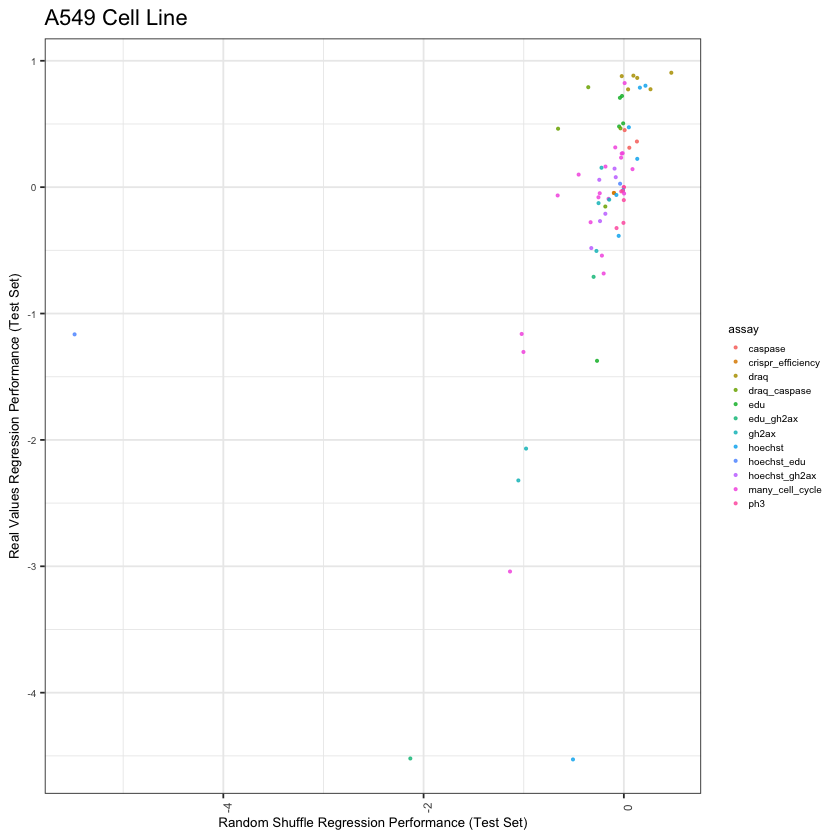

In [14]:
ggplot(filtered_results_df, aes(x = shuffle_true, y = shuffle_false)) +
    geom_point(aes(color = assay),
               size = 0.5,
               alpha = 0.8) +
    xlab("Random Shuffle Regression Performance (Test Set)") +
    ylab("Real Values Regression Performance (Test Set)") +
    ggtitle("A549 Cell Line") +
    theme_bw() +
    theme(axis.text.y = element_text(size = 6),
          axis.text.x = element_text(size = 7, angle = 90),
          axis.title = element_text(size = 8),
          legend.title = element_text(size = 7),
          legend.text = element_text(size = 6),
          legend.key.size = unit(0.3, "cm"))

output_file = file.path(figure_dir,
                        paste0("ranked_models_A549_with_shuffle_", consensus, ".png"))
ggsave(output_file, dpi = 300, height = 3.5, width = 4)

In [15]:
# Do not spread
plot_df <- results_df %>%
    dplyr::filter(cell_line == "A549",
                  data_fit == "test",
                  metric == "r_two") %>%
    dplyr::select(value, metric, shuffle, target, original_name,
                  feature_type, measurement, assay, description) %>%
    dplyr::arrange(desc(value))

plot_df$target <- factor(plot_df$target,
                         levels = rev(unique(plot_df$target)))
plot_df$original_name <- factor(plot_df$original_name,
                                levels = rev(unique(plot_df$original_name)))

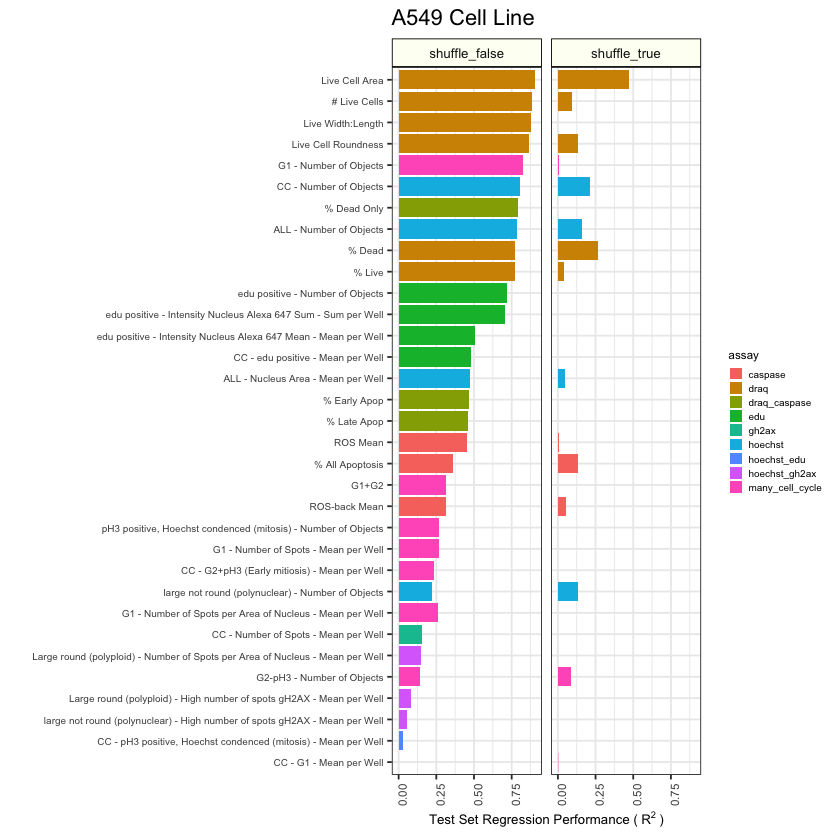

In [16]:
ggplot(plot_df %>% dplyr::filter(value > 0),
       aes(x = original_name, y = value)) +
    geom_bar(aes(fill = assay), stat="identity") +
    ylab(bquote("Test Set Regression Performance ("~R^2~")")) +
    xlab("") +
    ggtitle("A549 Cell Line") +
    coord_flip() +
    theme_bw() +
    facet_wrap(~shuffle, nrow = 1) +
    theme(axis.text.y = element_text(size = 6),
          axis.text.x = element_text(size = 7, angle = 90),
          axis.title = element_text(size = 8),
          legend.title = element_text(size = 7),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"),
          legend.text = element_text(size = 6),
          legend.key.size = unit(0.3, "cm"))

output_file = file.path(figure_dir,
                        paste0("ranked_models_A549_", consensus, ".png"))
ggsave(output_file, dpi = 300, height = 6, width = 8)

## Determine Classification Performance

In [17]:
roc_file <- file.path(results_dir,
                      paste0("full_cell_health_roc_results_", consensus, ".tsv.gz"))
full_roc_df <- readr::read_tsv(roc_file, col_types = readr::cols()) %>%
    dplyr::filter(cell_line %in% cell_lines)

pr_file <- file.path(results_dir,
                     paste0("full_cell_health_pr_results_", consensus, ".tsv.gz"))
full_pr_df <- readr::read_tsv(pr_file, col_types = readr::cols()) %>%
    dplyr::filter(cell_line %in% cell_lines)

auroc_df <- full_roc_df %>%
    dplyr::distinct(metric, target, auc, cell_line, data_fit, shuffle, y_transform, min_class_count)

aupr_df <- full_pr_df %>%
    dplyr::distinct(metric, target, auc, cell_line, data_fit, shuffle, y_transform, min_class_count)

auc_df <- dplyr::bind_rows(auroc_df, aupr_df)

# Replace missing data with zero (for plotting reasons)
auc_df$auc[is.na(auc_df$auc)] <- 0

head(auc_df, 10)

metric,target,auc,cell_line,data_fit,shuffle,y_transform,min_class_count
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
roc,cc_all_high_n_spots_h2ax_mean,0.04103343,ES2,train,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.46875000,ES2,test,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.25468165,HCC44,train,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.25000000,HCC44,test,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.36593407,A549,train,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.00000000,A549,test,shuffle_true,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.99240122,ES2,train,shuffle_false,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.87500000,ES2,test,shuffle_false,binarize,29
roc,cc_all_high_n_spots_h2ax_mean,0.93539326,HCC44,train,shuffle_false,binarize,29


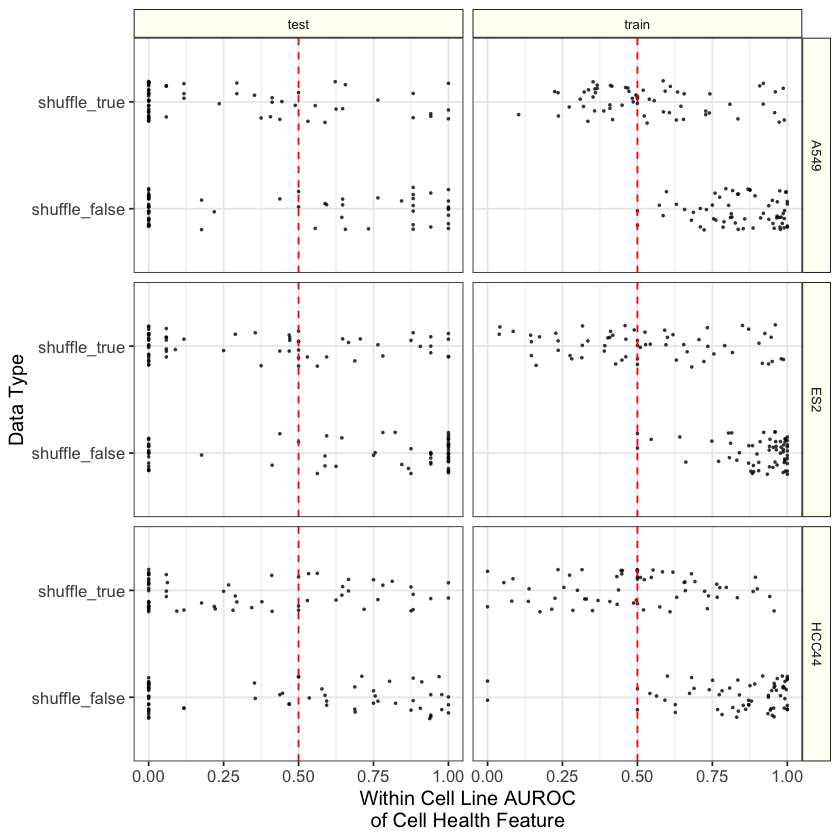

In [18]:
ggplot(auc_df %>% dplyr::filter(metric == "roc"),
       aes(x = shuffle,
           y = auc)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_grid(cell_line~data_fit) +
    xlab("Data Type") +
    ylab("Within Cell Line AUROC\nof Cell Health Feature") +
    coord_flip() +
    geom_hline(yintercept = 0.5, linetype = "dashed", color = "red") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_roc_differences_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

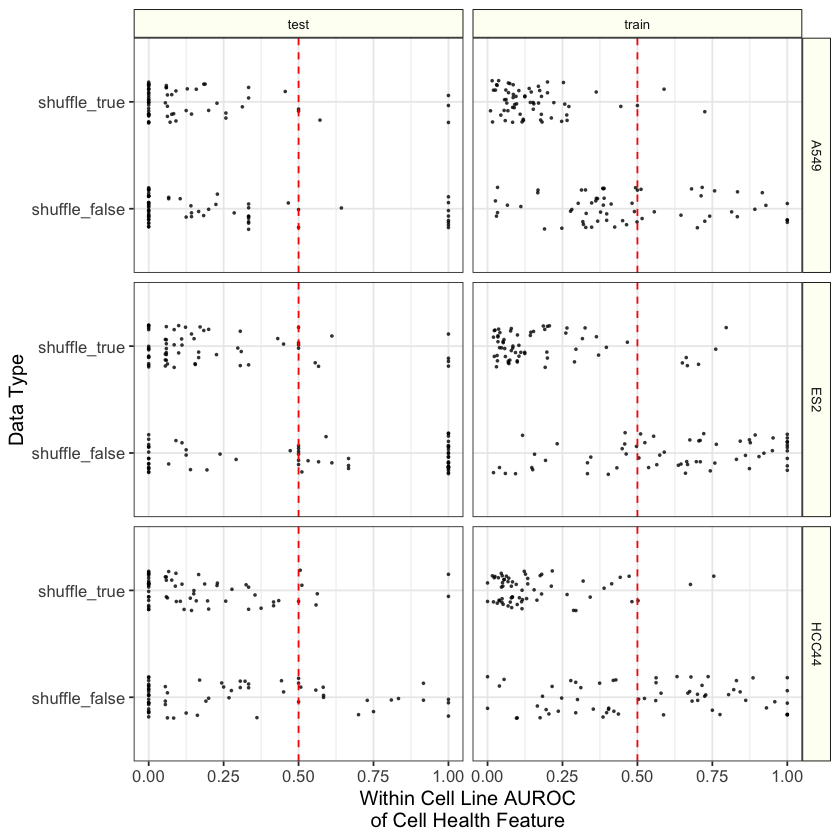

In [19]:
ggplot(auc_df %>% dplyr::filter(metric == "aupr"),
       aes(x = shuffle,
           y = auc)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_grid(cell_line~data_fit) +
    xlab("Data Type") +
    ylab("Within Cell Line AUROC\nof Cell Health Feature") +
    coord_flip() +
    geom_hline(yintercept = 0.5, linetype = "dashed", color = "red") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_pr_differences_", consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

In [20]:
# Compile Results
results_df <- auc_df %>%
    dplyr::left_join(label_df, by = c("target" = "updated_name")) %>%
    dplyr::mutate(plot_group = paste(metric, target, shuffle))

dim(results_df)
head(results_df, 2)

[1] 1512   15

metric,target,auc,cell_line,data_fit,shuffle,y_transform,min_class_count,original_name,feature_type,measurement,maria_thumbs_up,assay,description,plot_group
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
roc,cc_all_high_n_spots_h2ax_mean,0.04103343,ES2,train,shuffle_true,binarize,29,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,roc cc_all_high_n_spots_h2ax_mean shuffle_true
roc,cc_all_high_n_spots_h2ax_mean,0.46875000,ES2,test,shuffle_true,binarize,29,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,roc cc_all_high_n_spots_h2ax_mean shuffle_true


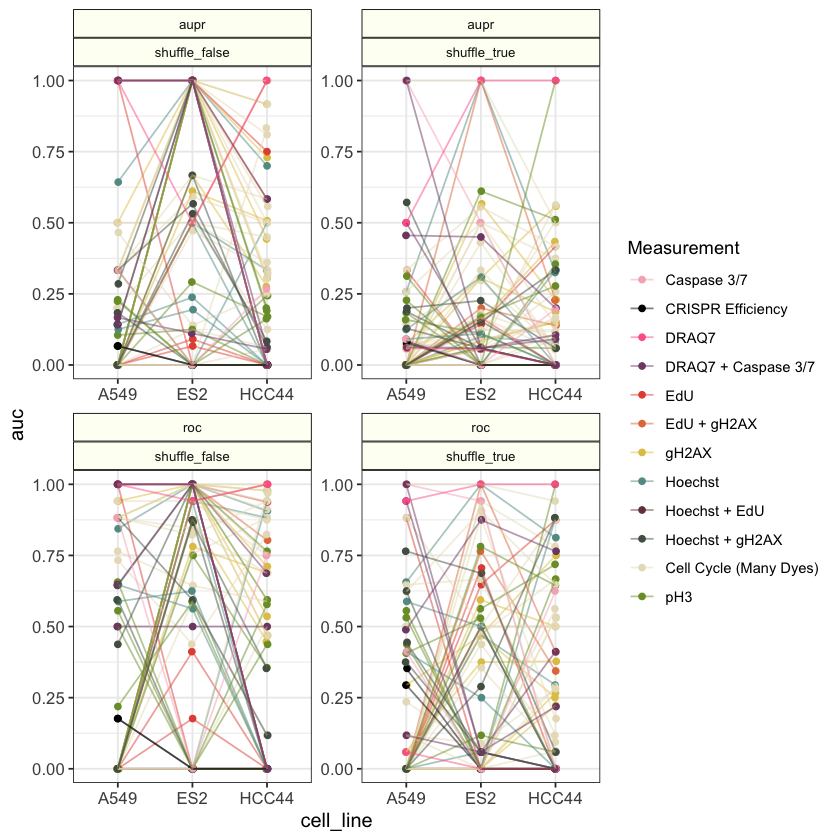

In [21]:
ggplot(results_df %>%
       dplyr::filter(data_fit == "test"),
       aes(x = cell_line,
           y = auc,
           group = plot_group)) +
    geom_jitter(aes(color = assay), width = 0.01) +
    geom_line(aes(color = assay),
              alpha = 0.5) +
    scale_color_manual(name = "Measurement",
                       values = dye_colors,
                       labels = dye_labels) +
    facet_wrap(metric~shuffle, scales = "free") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path(figure_dir,
                         paste0("cell_line_differences_classification_target_linked_full_",
                                consensus, ".png"))
ggsave(output_file, height = 5, width = 5, dpi = 500)

## Rank Models based on A549 Performance

In [22]:
filtered_results_df <- results_df %>%
    dplyr::filter(cell_line == "A549",
                  data_fit == "test",
                  metric == "aupr") %>%
    dplyr::select(auc, metric, shuffle, target, original_name,
                  feature_type, measurement, assay, description) %>%
    tidyr::spread(shuffle, auc) %>%
    dplyr::arrange(desc(shuffle_false))

filtered_results_df$target <- factor(filtered_results_df$target,
                                     levels = rev(unique(filtered_results_df$target)))
filtered_results_df$original_name <- factor(filtered_results_df$original_name,
                                            levels = rev(unique(filtered_results_df$original_name)))


# Output ranked models
output_file <- file.path("..", "4.apply", "repurposing_cellhealth_shiny", "data",
                         paste0("A549_ranked_models_classification_", consensus, ".tsv"))
readr::write_tsv(filtered_results_df, output_file)

print(dim(filtered_results_df))
head(filtered_results_df, 10)

[1] 63  9


metric,target,original_name,feature_type,measurement,assay,description,shuffle_false,shuffle_true
<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
aupr,cc_cc_g2_ph3_pos_early_mitosis_mean,CC - G2+pH3 (Early mitiosis) - Mean per Well,cell_cycle,g2_m_arrest,many_cell_cycle,fraction of G2/M cells,1.0000000,0.05882353
aupr,cc_edu_pos_alexa647_intensity_nucleus_area_mean,edu positive - Intensity Nucleus Alexa 647 Mean - Mean per Well,cell_cycle,s_arrest,edu,In S phase cells: how much EdU was incorporated (average intensity per cell),1.0000000,0.33333333
aupr,cc_g1_plus_g2,G1+G2,cell_cycle,NA,many_cell_cycle,G1+G2,1.0000000,1.00000000
aupr,vb_live_cell_area,Live Cell Area,viability,NA,draq,cell size,1.0000000,0.05882353
aupr,vb_percent_all_apoptosis,% All Apoptosis,viability,apoptosis,caspase,fraction of casp positive cells,1.0000000,1.00000000
aupr,vb_percent_all_early_apoptosis,% Early Apop,viability,apoptosis,draq_caspase,fraction of casp positive (no DRAQ7) cells,1.0000000,0.50000000
aupr,vb_percent_dead,% Dead,viability,death,draq,fraction of DRAQ7 positive cells,1.0000000,0.50000000
aupr,vb_percent_dead_only,% Dead Only,viability,apoptosis,draq_caspase,fraction of DRAQ7 positive / Casp negative cells,1.0000000,0.06250000
aupr,cc_all_nucleus_area_mean,ALL - Nucleus Area - Mean per Well,cell_cycle,NA,hoechst,average nucleus area,0.6428571,0.25757576


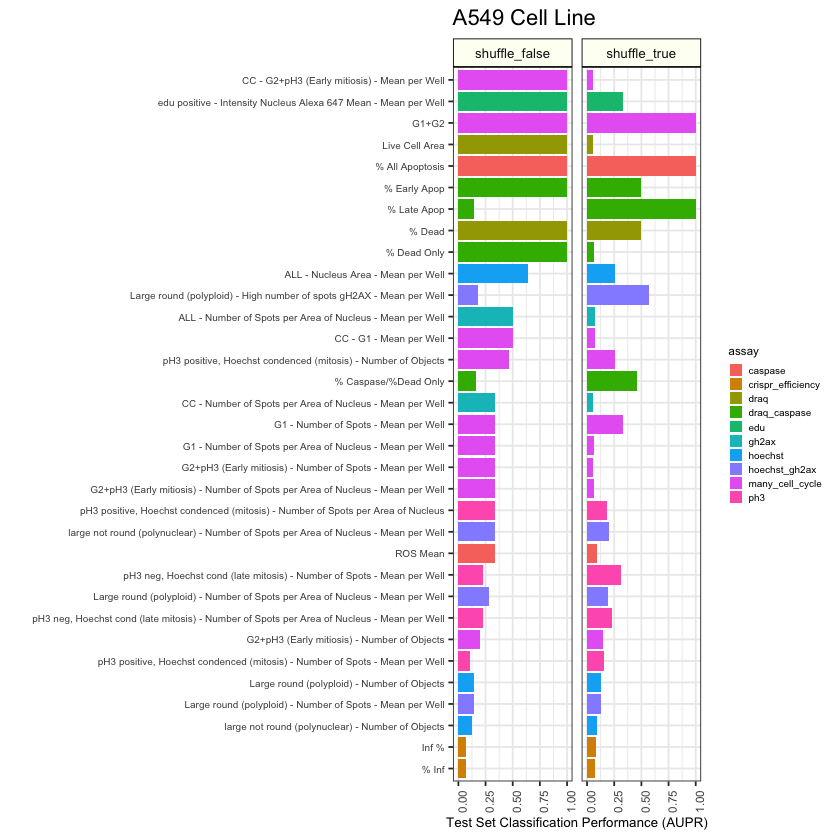

In [23]:
# Do not spread
plot_df <- results_df %>%
    dplyr::filter(cell_line == "A549",
                  data_fit == "test",
                  metric == "aupr") %>%
    dplyr::select(auc, metric, shuffle, target, original_name,
                  feature_type, measurement, assay, description) %>%
    dplyr::arrange(desc(auc))

plot_df$target <- factor(plot_df$target,
                         levels = rev(unique(plot_df$target)))
plot_df$original_name <- factor(plot_df$original_name,
                                levels = rev(unique(plot_df$original_name)))

ggplot(plot_df %>% dplyr::filter(auc > 0),
       aes(x = original_name, y = auc)) +
    geom_bar(aes(fill = assay), stat="identity") +
    ylab("Test Set Classification Performance (AUPR)") +
    xlab("") +
    ggtitle("A549 Cell Line") +
    coord_flip() +
    ylim(c(0, 1)) +
    facet_wrap(~shuffle, nrow = 1) +
    theme_bw() +
    theme(axis.text.y = element_text(size = 6),
          axis.text.x = element_text(size = 7, angle = 90),
          axis.title = element_text(size = 8),
          legend.title = element_text(size = 7),
          legend.text = element_text(size = 6),
          legend.key.size = unit(0.3, "cm"),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file = file.path(figure_dir,
                        paste0("ranked_models_A549_", consensus, "_classification.png"))
ggsave(output_file, dpi = 300, height = 6, width = 8)